In [2]:
import fireducks.pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/bike_rentals.csv', sep=';')
df.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2012,23,summer,no,0,moderate,23.78,27.275,73,11.0014,133
1,2011,8,summer,no,0,good,27.88,31.820,57,0.0000,132
2,2012,2,winter,no,1,good,20.50,24.240,59,0.0000,19
3,2011,20,summer,no,1,bad,25.42,28.790,83,19.9995,58
4,2011,17,summer,no,1,bad,26.24,28.790,89,0.0000,285


# 1 Analysis (10 points)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7689 non-null   int64  
 1   hour        7689 non-null   int64  
 2   season      7689 non-null   object 
 3   holiday     7689 non-null   object 
 4   workingday  7689 non-null   int64  
 5   weather     7689 non-null   object 
 6   temp        7689 non-null   float64
 7   atemp       7689 non-null   float64
 8   humidity    7689 non-null   int64  
 9   windspeed   7689 non-null   float64
 10  count       7689 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 660.9+ KB


1a) There are no missing values, all columns contain 7689 entries which is the length of the dataframe.

1b) Missing values would be a problem for clustering because that would mean the data is missing key values that could be used to cluster the data.s

In [4]:
df.describe()

,year,hour,workingday,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,2011.495513,11.565353,0.677331,20.267085,23.696581,61.771492,12.802070,191.419430
std,0.500012,6.915777,0.467528,7.824066,8.514199,19.302151,8.178889,182.140265
min,2011.000000,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,0.000000,13.940000,16.665000,46.000000,7.001500,41.000000
50%,2011.000000,12.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,2012.000000,18.000000,1.000000,26.240000,31.060000,77.000000,16.997900,283.000000
max,2012.000000,23.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


1c) The columns that contain continous data are: year, hour, workingday, temp, atemp, humidity, windspeed, count

In [9]:
df.value_counts()

year  hour  season  holiday  workingday  weather   temp   atemp   humidity  windspeed  count
2011  6     autumn  no       0           good      9.84   12.880  65        7.0015     11       2
2012  2     winter  no       1           good      12.30  16.665  61        0.0000     4        2
      3     spring  no       1           good      22.96  26.515  83        6.0032     6        2
            summer  no       1           good      20.50  24.240  77        6.0032     7        2
2011  0     autumn  no       0           bad       14.76  16.665  93        19.9995    47       1
                                                                                               ..
2012  23    winter  no       1           moderate  14.76  18.180  50        6.0032     57       1
                                                          18.940  87        0.0000     23       1
                                                   18.04  21.970  94        0.0000     126      1
                         

1d) The columns that contain categorical data are: season, holiday, and weather

1e) The column that has binary data is workingday, 1 means yes its a working day, 0 means no its not

# 2 Preprocessing (6 points)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7689 non-null   int64  
 1   hour        7689 non-null   int64  
 2   season      7689 non-null   object 
 3   holiday     7689 non-null   object 
 4   workingday  7689 non-null   int64  
 5   weather     7689 non-null   object 
 6   temp        7689 non-null   float64
 7   atemp       7689 non-null   float64
 8   humidity    7689 non-null   int64  
 9   windspeed   7689 non-null   float64
 10  count       7689 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 660.9+ KB


In [11]:
df.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2012,23,summer,no,0,moderate,23.78,27.275,73,11.0014,133
1,2011,8,summer,no,0,good,27.88,31.820,57,0.0000,132
2,2012,2,winter,no,1,good,20.50,24.240,59,0.0000,19
3,2011,20,summer,no,1,bad,25.42,28.790,83,19.9995,58
4,2011,17,summer,no,1,bad,26.24,28.790,89,0.0000,285


In [19]:
df_dummies = pd.get_dummies(df[['season', 'weather']])
df_binary = df[['holiday']].copy()
df_binary['holiday'] = df_binary['holiday'].map({'yes': 1, 'no': 0})

df_numeric = df[['hour', 'temp', 'atemp', 'humidity', 'windspeed', 'count']]
df_year = df['year'].astype(str)

df_preprocessed = pd.concat(
    [
        df_numeric,
        df_dummies,
        df_binary
    ], axis=1
)

df_preprocessed_norm = pd.concat(
    [
        (df_numeric - df_numeric.mean())/df_numeric.std(),
        df_dummies,
        df_binary
    ], axis=1
)
df_preprocessed.head()

,hour,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday
0,23,23.78,27.275,73,11.0014,133,False,False,True,False,False,False,True,0
1,8,27.88,31.820,57,0.0000,132,False,False,True,False,False,True,False,0
2,2,20.50,24.240,59,0.0000,19,False,False,False,True,False,True,False,0
3,20,25.42,28.790,83,19.9995,58,False,False,True,False,True,False,False,0
4,17,26.24,28.790,89,0.0000,285,False,False,True,False,True,False,False,0


In [20]:
df_preprocessed_norm.head()

,hour,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday
0,1.653415,0.448988,0.420288,0.581723,-0.220161,-0.320739,False,False,True,False,False,False,True,0
1,-0.515539,0.973013,0.954103,-0.247200,-1.565258,-0.326229,False,False,True,False,False,True,False,0
2,-1.383121,0.029769,0.063825,-0.143585,-1.565258,-0.946630,False,False,False,True,False,True,False,0
3,1.219624,0.658598,0.598226,1.099800,0.880001,-0.732509,False,False,True,False,True,False,False,0
4,0.785833,0.763403,0.598226,1.410646,-1.565258,0.513783,False,False,True,False,True,False,False,0


# 3 K=2 (8 points)

In [22]:
kmeans = KMeans(n_clusters=2, n_init='auto')
df_preprocessed['cluster'] = kmeans.fit_predict(df_preprocessed_norm)
df_preprocessed.head()

,hour,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday,cluster
0,23,23.78,27.275,73,11.0014,133,False,False,True,False,False,False,True,0,0
1,8,27.88,31.820,57,0.0000,132,False,False,True,False,False,True,False,0,0
2,2,20.50,24.240,59,0.0000,19,False,False,False,True,False,True,False,0,1
3,20,25.42,28.790,83,19.9995,58,False,False,True,False,True,False,False,0,0
4,17,26.24,28.790,89,0.0000,285,False,False,True,False,True,False,False,0,0


In [28]:
df_preprocessed['cluster'].value_counts()

cluster
1    4023
0    3666
Name: count, dtype: int64

3a) There are 2 clusters with 4023 rows within cluster 1 and 3666 rows within cluster 0

In [29]:
df_preprocessed.groupby('cluster').mean().T

cluster,0,1
hour,13.330606,9.956749
temp,26.943688,14.182963
atemp,30.890063,17.141447
humidity,58.767867,64.508576
windspeed,12.904476,12.708751
count,282.154937,108.735769
season_autumn,0.116748,0.372110
season_spring,0.335243,0.171762
season_summer,0.502455,0.025106
season_winter,0.045554,0.431022


3b) Based on the data it seems the cluster with the least rentals is cluster 1 with 108.74 and the cluster with the most is cluster 0 with 282.15, the reason for this could be that cluster one
contains more winter, autumn, and humidty than cluster 0, this is typicaly considered more where colder weather comes out, and cold weather means more heavy clothing which is considered a nightmare for biking since combined with the sweating from biking it could be dangerous. While cluster 0 contains more spring and summer which means less clothes is a given, if you notice in the olympics bikers have thin and light clothes to help them stay regulated.

# 4 K=3 (10 points)

In [30]:
kmeans = KMeans(n_clusters=3, n_init='auto')
df_preprocessed['cluster'] = kmeans.fit_predict(df_preprocessed_norm)
df_preprocessed['cluster'].value_counts()

cluster
0    2662
1    2618
2    2409
Name: count, dtype: int64

4a) There are three clusters with 2662 rows within cluster 0, 2618 rows within cluster 1, and 2409 rows within cluster 2

In [31]:
df_preprocessed.groupby('cluster').mean().T

cluster,0,1,2
hour,15.709992,5.983193,13.051889
temp,27.482322,20.155775,12.415052
atemp,31.480905,23.806070,14.975737
humidity,53.435387,78.602750,52.691573
windspeed,13.679731,9.087457,15.869118
count,349.230278,79.588617,138.567870
season_autumn,0.131480,0.303285,0.324201
season_spring,0.357626,0.298701,0.077210
season_summer,0.464313,0.268908,0.001245
season_winter,0.046582,0.129106,0.597343


4b) The cluster with the least amount of rentals is cluster 1 with a count of aaround 78.59, and the most is cluster 0 with a count of 349.23. The reason for this might be at a few columns, the most notable being humidty, autumn, winter, bad weather, and hour. In cluster 1 humidty and bad weather is more prominent and the hour is lower than the rest. This must show that because of the harsher conditions and lese time for ideal biking sales are down during these times, and the small hours of great biking conditions because of the worse weather around the time means biking is not ideal compared to the other clusters most prevelant conditions.

4c) Given what we have seen so far the cluster amount, aka 2 or 3, with more useful info is with 2 clusters, the reason is with three there is not much of a difference besides smaller and harder patterns to make conclusive decisions on, with two clusters the data is much more usable and more patterns can be seen.

# 5 Elbow Method (11 points)

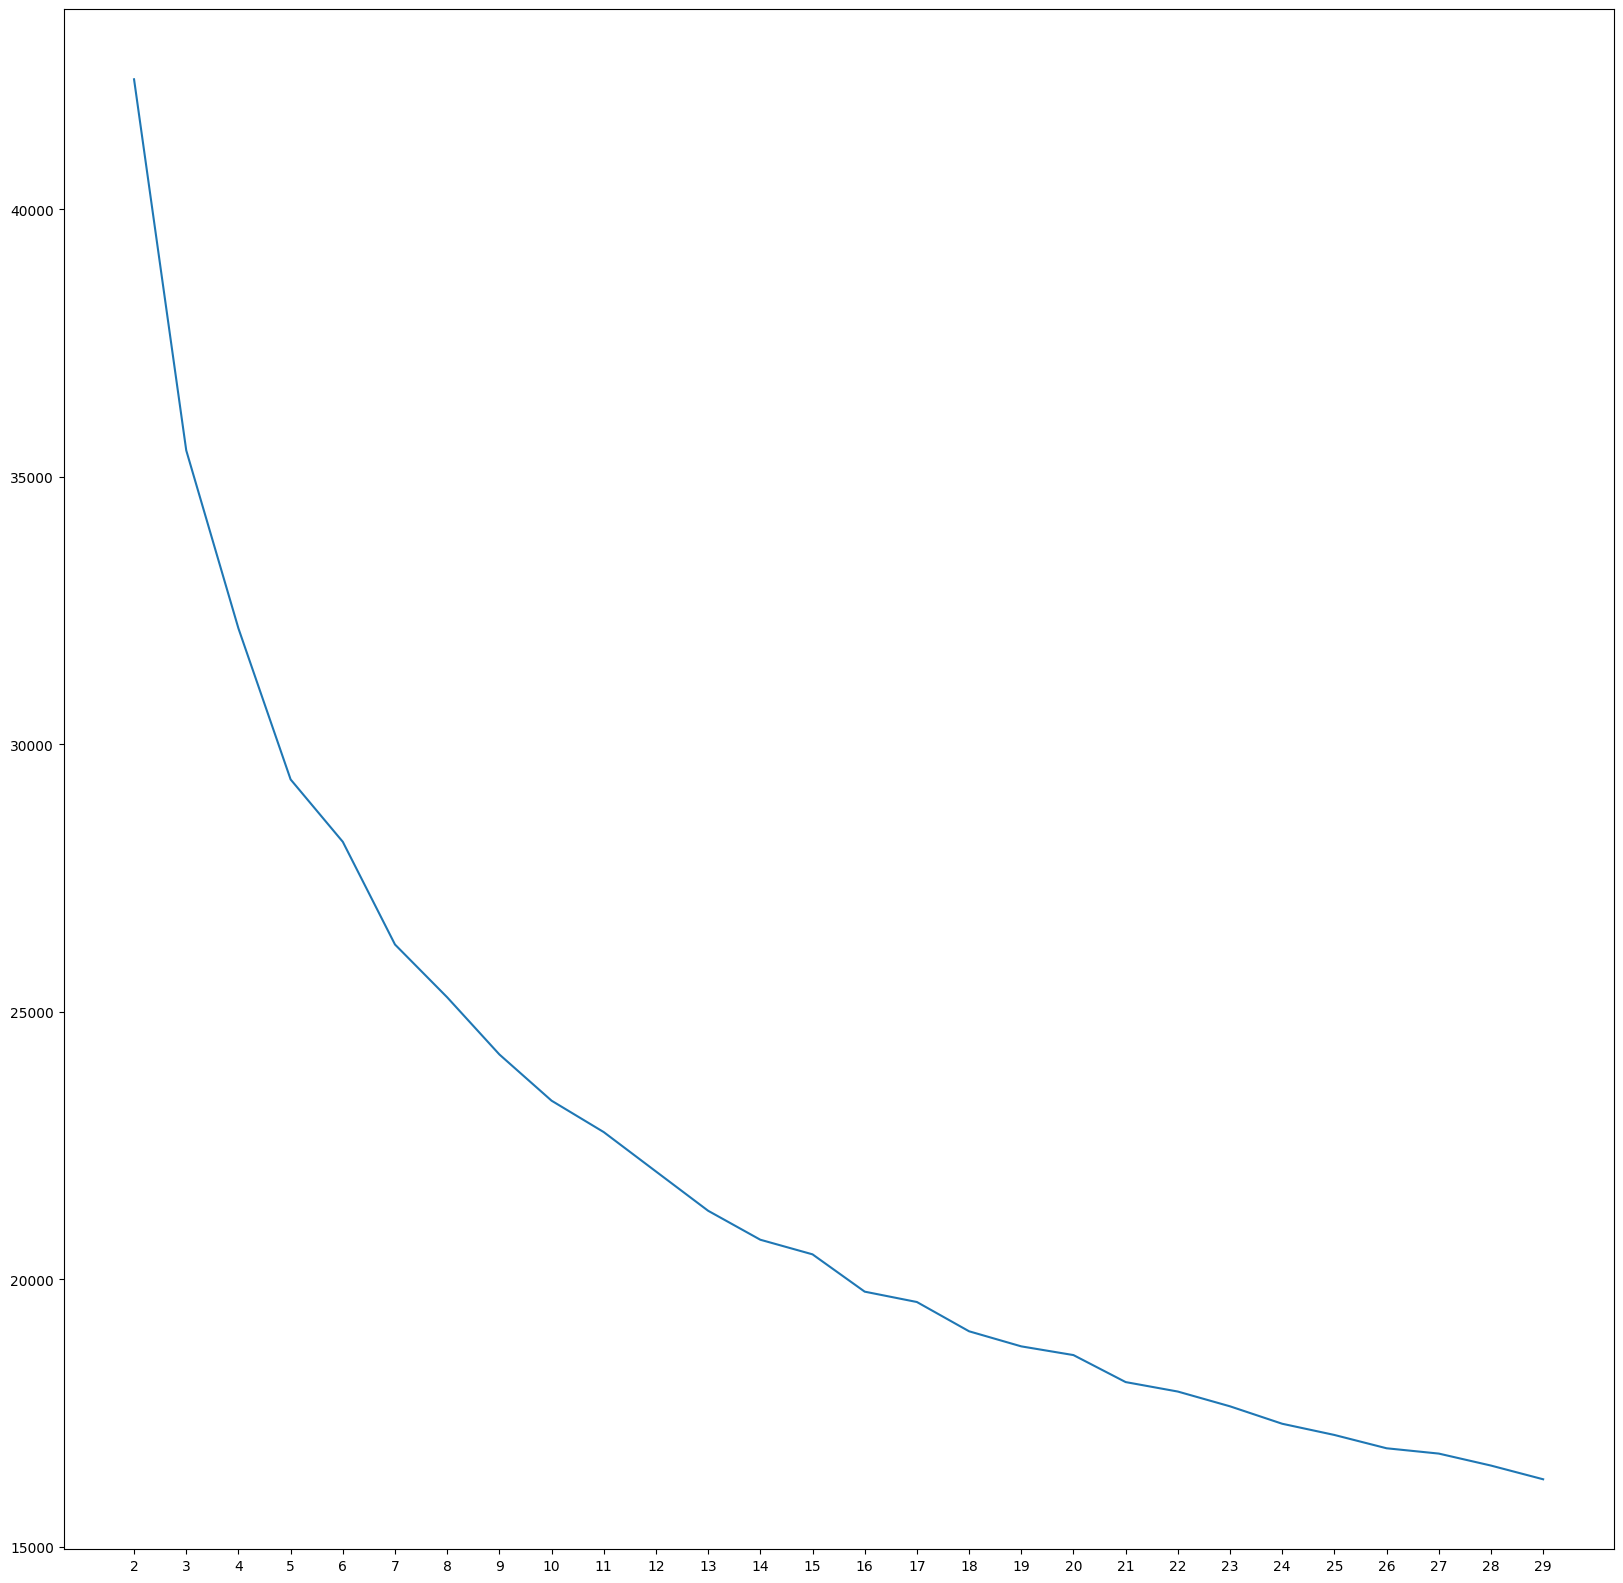

In [36]:
import matplotlib.pyplot as plt
inertias = []
plt.figure(figsize=(20, 20))

for k in range(2, 30):
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_preprocessed_norm)
  inertias.append(kmeans.inertia_)

plt.plot(range(2, 30), inertias)
plt.xticks(range(2, 30))
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, n_init='auto')
df_preprocessed['cluster'] = kmeans.fit_predict(df_preprocessed_norm)
df_preprocessed['cluster'].value_counts()

cluster
3    1972
1    1451
2    1435
4    1432
0    1399
Name: count, dtype: int64

5a) Within each cluser there are: 
for cluster 3 there are 1972 rows, 
for cluster 1 there are 1451 rows, 
for cluster 2 there are 1435 rows, 
for cluster 4 there are 1432 rows, 
and for cluster 0 there are 1399 rows

In [ ]:
df_preprocessed.groupby('cluster').mean().T

cluster,0,1,2,3,4
hour,4.886347,17.323225,4.106620,15.219067,14.699022
temp,11.554439,19.010889,24.513143,28.946582,13.844372
atemp,14.552927,22.583553,28.249254,33.030464,16.341463
humidity,70.733381,73.296347,76.349129,50.130325,42.761173
windspeed,9.563568,10.343549,9.565466,13.899724,20.188892
count,57.987134,206.563749,64.385366,381.801217,171.557961
season_autumn,0.379557,0.486561,0.110105,0.084686,0.253492
season_spring,0.109364,0.245348,0.361672,0.359533,0.127793
season_summer,0.002859,0.117850,0.510105,0.524341,0.001397
season_winter,0.508220,0.150241,0.018118,0.031440,0.617318


5b) The cluser with the least amount of sales is cluster 0, and with the most is cluster 3. The key reason may that be the average hour in cluster 0 is low, the temp is the lowest, its peretty humid, theres not that much wind, and theres more holidays than cluster 3. This could indicate that the average day within cluster 0 is worse leading to a not so ideal day for biking, this of course affects sales causing a drop in sales.